# Examine constant current sausage stability

I see an oscillating sausage stable, unstable region along the $\bar{\lambda}$ axis for $\epsilon$ ~ 1. In this  notebook I want to see if this behaviour also occurs in an analytic treatment of the minimized energy equation and euler-lagrange equation for the simplified case of constant current.

In [98]:
import sys
sys.path.append('..')
sys.path.append('../..')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

/home/jensv/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [50]:
import sympy as sp
sp.init_printing()
import numpy as np

# Look at energy equation for m=0 (sausage), epsilon=1.

Here is the energy expression derived in the paper
$\delta W = \frac{[2 \bar{k} - m \epsilon \bar{\lambda}] [(\delta + 1) 2 \bar{k} - (\delta-1) m \epsilon \bar{\lambda}]}{\bar{k}^2+m^2} + (\epsilon^2 - 1)\bar{\lambda}^2 - \frac{(m \bar{\lambda} - 2 \bar{k})^2}{\bar{k}} \frac{K_m(|\bar{k}|)}{K_m'(|\bar{k}|)} > 0$

Setting m=0 and epsilon=1 and mutiplied by $\xi^2$ to avoid a singularity when $xi=0$, 
$\delta W = (\xi' \xi + \xi^2) - \bar{k} \frac{K_0(|\bar{k}|)}{K_0'(|\bar{k}|)} \xi^2> 0$

The second term, the vacuum term is always positive since the fraction of Bessel functions is negative for all $\bar{k}$ values as can be seen here.

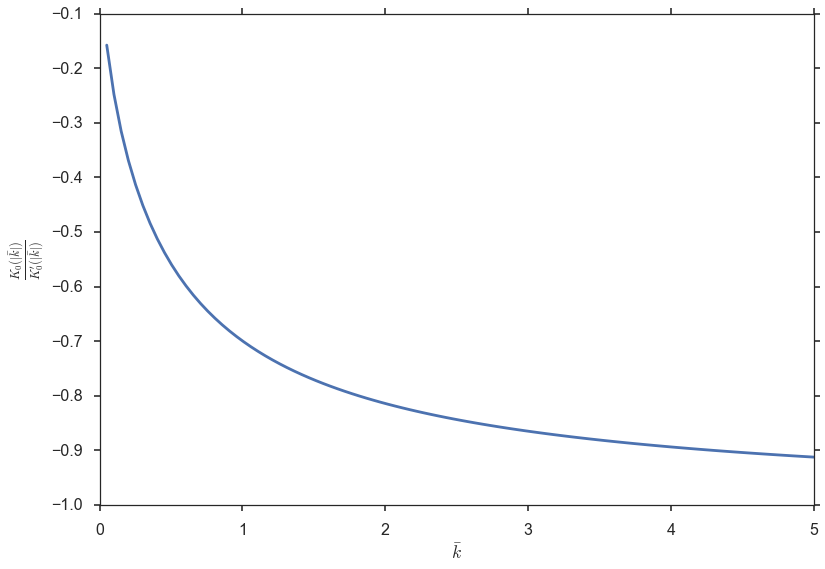

In [122]:
from scipy.special import kv, kvp
k = np.linspace(0, 5, 100)
plt.plot(k, kv(0, k)/kvp(0, k))
plt.xlabel(r'$\bar{k}$4 (\xi' \xi')
plt.ylabel(r"$\frac{K_0(|\bar{k}|)}{K_0'(|\bar{k}|)}$")
plt.show()

So the negative term is $4 \xi' \xi$ when $\xi$ and it's derivative have equal and oppostite signs. This term has to be of larger magnitude than  $4 \xi^2 - 4 \bar{k} \frac{K_0(|\bar{k}|)}{K_0'(|\bar{k}|)}$.

# Let's look at solutions to the Euler-Lagrange equation assuming constant current.

Here is the Euler Lagrange equation:
$\frac{\partial}{\partial r}\left[f \frac{\partial \xi}{\partial r}\right] - g \xi = 0$
$f = r(krB_{z} + mB_{\phi})/(k^{2}r^{2} + m^{2})$
$g = \frac{1}{r} \frac{(kr B_z - m B_\theta)^2}{k^2 r^2 + m^2} + \frac{1}{r} (k r B_z + m B_\theta)^2 \frac{k^2r^2 + m^2 -1}{k^2r^2 +m^2} - \frac{2B_\theta}{r} \frac{d}{dr} (r B_\theta) - \frac{d}{dr} (\frac{k^2r^2 B^2_z- m^2 B^2_\theta}{k^2r^2 + m^2})$

Assuming $m=0$ constant $B_z$ and $B_\theta$ = 1/2 j_0 r,

$f=\frac{B_z}{k}$ and
$g=-j_0^2 r + k^2 r B^2_z + \frac{B^2_z}{r} $

Note that f does not depend on r, this eliminates the $xi'$ from the Euler-Lagrange equation, which becomes

$$\xi'' - \frac{-j_0^2 r + k^2 r B^2_z + \frac{B^2_z}{r}}{\frac{B_z}{k}} \xi = 0$$

It is obvious that for certain roots of the factor in front of $\xi$ this equation will be oscillatory. Solving the equation is a little tricky due to the 1/r term. Instead I will plot the behaviour of the equation for various $k$, $B_z$ and $j_z$.

In [123]:
from scipy.integrate import ode

In [124]:
def der(r, y, k, b_z, j_0):   
    xi_der = y[1]
    xi_prime_der = k/b_z*(b_z**2*k**2*r + b_z**2/r - j_0**2*r) * y[0]
    return [xi_der, xi_prime_der]

# Behaviour when $B_z$ dominates

Both $\xi$ and $\xi'$ become positive resulting in stability.

In [84]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(1., 10., 1.)
t1 = 1
dt = 0.01
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

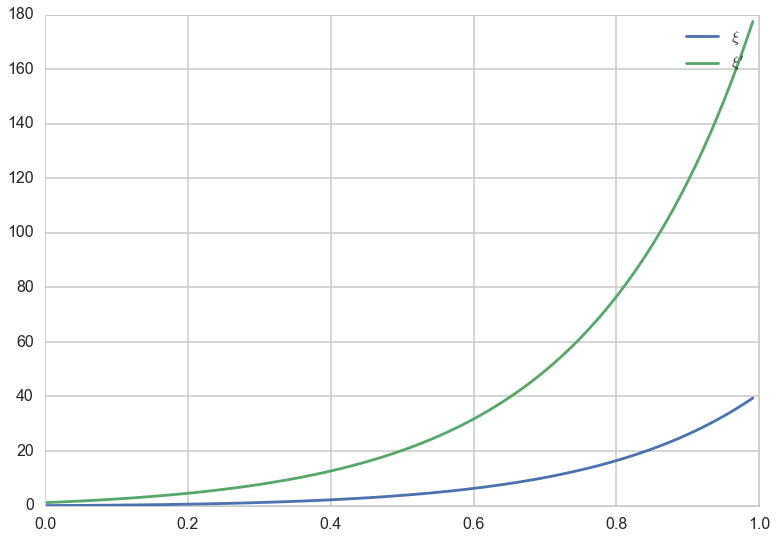

In [85]:
result = np.asarray(result)
plt.plot(time, result[:,0], label=r'$\xi$')
plt.plot(time, result[:,1], label=r"$\xi'$")
plt.legend()

# Behaviour when \bar{k} dominates

Both $\xi$ and $\xi'$ become positive resulting in stability.

In [86]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(10., 1., 1.)
t1 = 1
dt = 0.01# Behaviour when B_z dominates
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

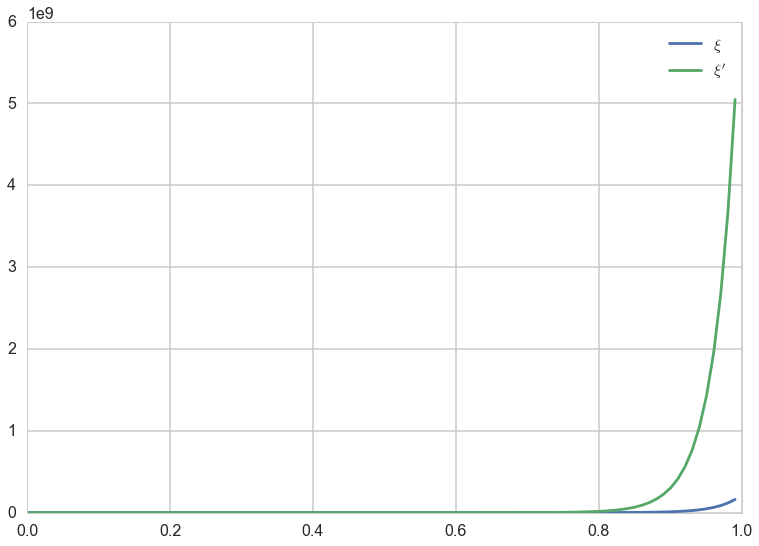

In [87]:
result = np.asarray(result)
plt.plot(time, result[:,0], label=r'$\xi$')
plt.plot(time, result[:,1], label=r"$\xi'$")
plt.legend()

# Behaviour when $j_0$ dominates ~ high $\bar{\lambda}$

# $\xi$ and $\xi'$ oscillate

In [146]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(1., 1., 100.)
t1 = 1
dt = 0.001
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

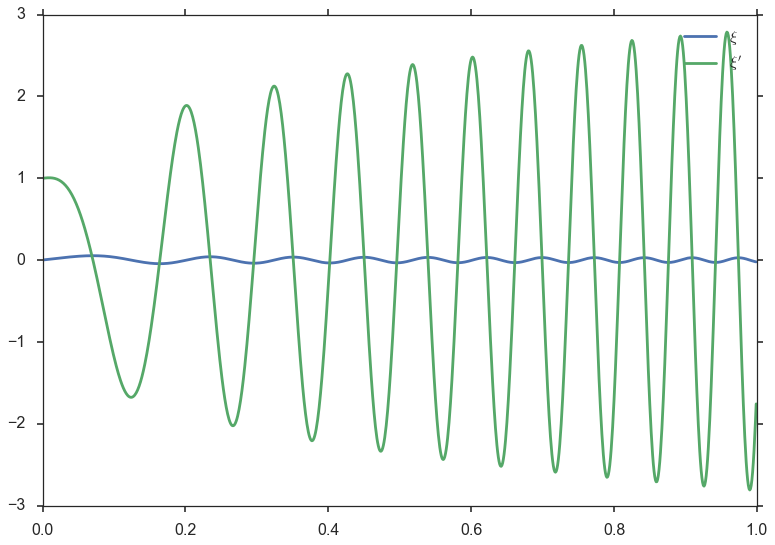

In [147]:
result = np.asarray(result)
plt.plot(time, result[:,0], label=r'$\xi$')
plt.plot(time, result[:,1], label=r"$\xi'$")
plt.legend()

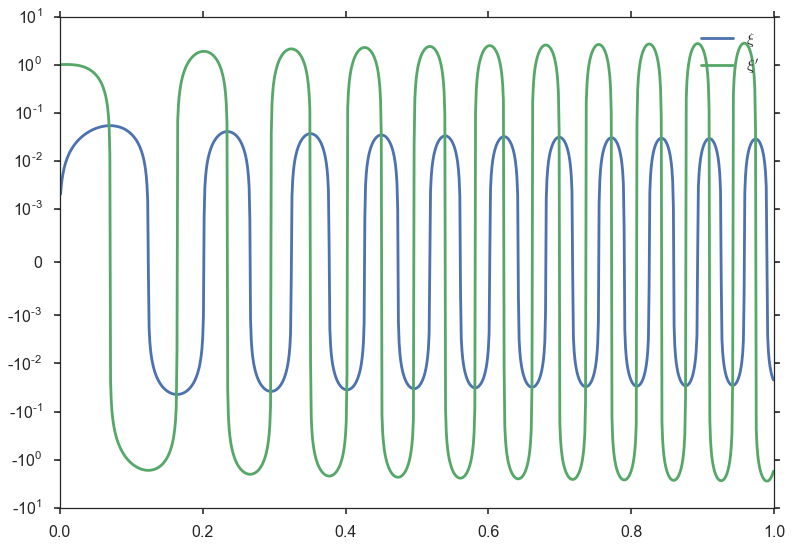

In [148]:
result = np.asarray(result)
plt.plot(time, result[:,0], label=r'$\xi$')
plt.plot(time, result[:,1], label=r"$\xi'$")
plt.yscale('symlog', linthreshy=1e-3)
plt.legend()

# As I vary $j_0$ ($~\bar{\lambda}$) the sign of $\xi \xi'$ changes 

In [157]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(1., 1., 15.)
t1 = 1
dt = 0.001
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

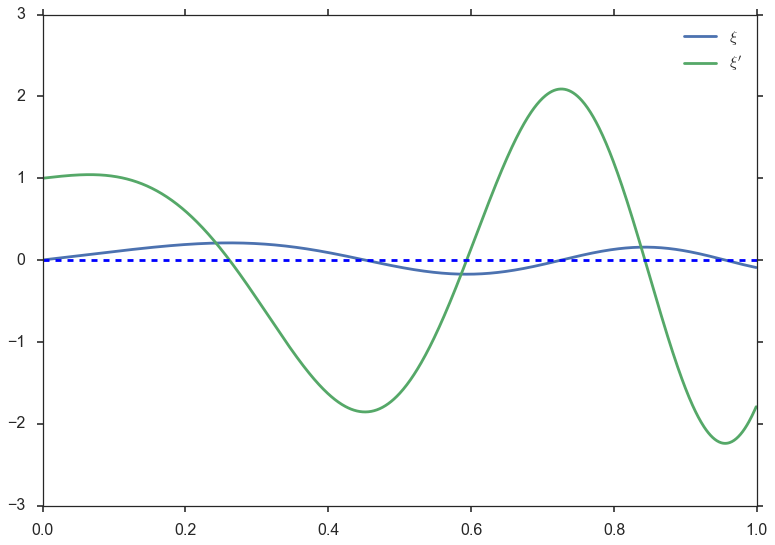

In [158]:
result = np.asarray(result)
plt.plot(time, result[:,0], label=r'$\xi$')
plt.plot(time, result[:,1], label=r"$\xi'$")
plt.axhline(0, linestyle='--')
plt.legend()

In [153]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(1., 1., 8.)
t1 = 1
dt = 0.001
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

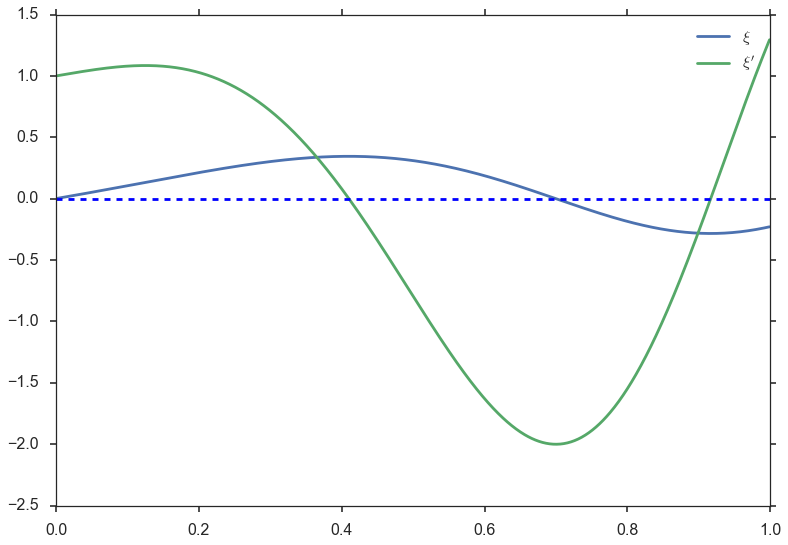

In [156]:
result = np.asarray(result)
plt.plot(time, result[:,0], label=r'$\xi$')
plt.plot(time, result[:,1], label=r"$\xi'$")
plt.axhline(0, linestyle='--')
plt.legend()

# Stability condition

For instability $\frac{\xi'}{\xi} < - 1 + \bar{k} \frac{K_0(|\bar{k}|)}{K'_0(|\bar{k}|)} $.
For $\bar{k} = 1$ 

In [204]:
-1+0.1*kv(0, 0.1)/kvp(0, 0.1)

Increasing $j_0$, $\frac{\xi'}{\xi}$ crosses the threshold several times

In [256]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(0.1, 1., 10)
t1 = 1
dt = 0.001
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

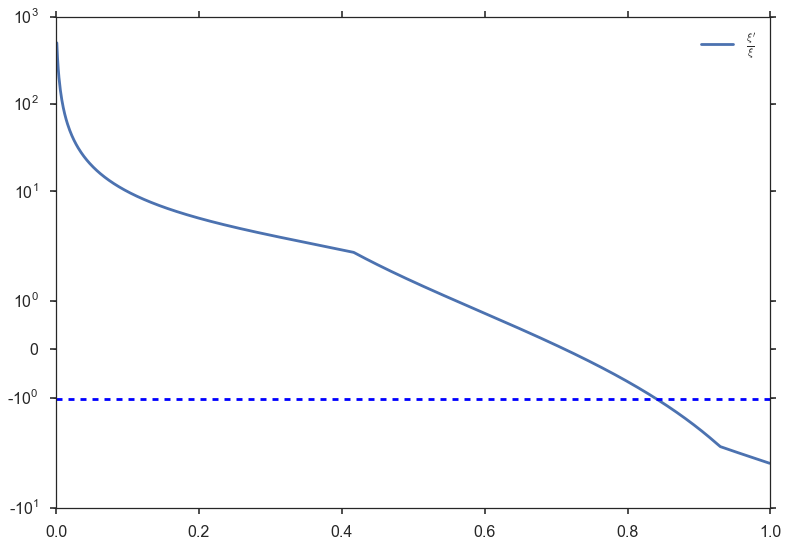

In [257]:
result = np.asarray(result)
plt.plot(time, result[:,1]/result[:,0], label=r"$\frac{\xi'}{\xi}$")
plt.axhline(-1.025, linestyle='--')
plt.yscale('symlog')
plt.legend()
plt.show()

In [258]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(0.1, 1., 15)
t1 = 1
dt = 0.001
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

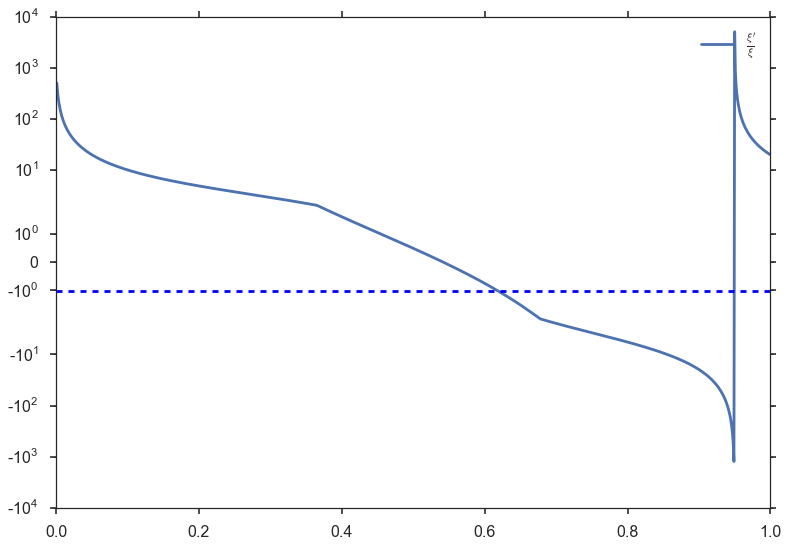

In [259]:
result = np.asarray(result)
plt.plot(time, result[:,1]/result[:,0], label=r"$\frac{\xi'}{\xi}$")
plt.axhline(-1.025, linestyle='--')
plt.yscale('symlog')
plt.legend()
plt.show()

In [261]:
integrator = ode(der).set_integrator('lsoda')
integrator.set_initial_value([1e-3, 1], 1e-3).set_f_params(0.1, 1., 25)
t1 = 1
dt = 0.001
result = []
time = []
while integrator.successful() and integrator.t < t1:
     time.append(integrator.t)
     result.append(integrator.integrate(integrator.t+dt))

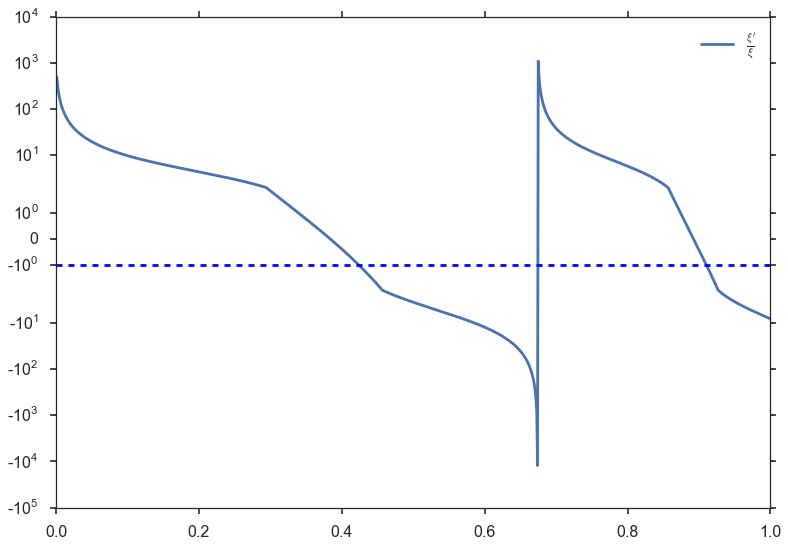

In [262]:
result = np.asarray(result)
plt.plot(time, result[:,1]/result[:,0], label=r"$\frac{\xi'}{\xi}$")
plt.axhline(-1.025, linestyle='--')
plt.yscale('symlog')
plt.legend()
plt.show()